In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import matplotlib.lines as lns

def draw_system(A,b):
    plt.figure(figsize=(15, 10))
    
    sol=la.solve(A,b)
    x1=np.linspace(sol[0]-10,sol[0]+10,100)

    x2=(b[0]-A[0,0]*x1)/A[0,1]
    plt.plot(x1,x2)
    
    x2=(b[1]-A[1,0]*x1)/A[1,1]
    plt.plot(x1,x2)

    plt.xlabel("X1")
    plt.ylabel("X2")
    
def draw_point(p,clr,txt):
    plt.plot(p[0],p[1],'og',linewidth=10,color=clr)
    plt.text(p[0],p[1]+1,txt,fontsize = 16)
    
def draw_dotted_lines_gz(x0,x1):
    limits=plt.axis()
    l1=lns.Line2D([limits[0],limits[1]],[x0[1],x0[1]],linestyle="--",color="magenta")
    l2=lns.Line2D([x1[0],x1[0]],[limits[2],limits[3]],linestyle="--",color="black")
    ax = plt.gca()
    ax.add_line(l1)
    ax.add_line(l2)
    
def draw_dotted_lines(x0,x1,step):
    limits=plt.axis()
    l1=lns.Line2D([limits[0],limits[1]],[x0[1],x0[1]],linestyle="--",color="magenta")
    l2=lns.Line2D([x1[0],x1[0]],[limits[2],limits[3]],linestyle="--",color="black")
    l3=lns.Line2D([limits[0],limits[1]],[x1[1],x1[1]],linestyle="--",color="black")
    l4=lns.Line2D([x0[0],x0[0]],[limits[2],limits[3]],linestyle="--",color="magenta")
    ax = plt.gca()
    
    if step==1:
        ax.add_line(l1)
        ax.add_line(l2)
    elif step==2:
        ax.add_line(l3)
        ax.add_line(l4)
    else:
        ax.add_line(l1)
        ax.add_line(l2)
        ax.add_line(l3)
        ax.add_line(l4)

# Iterativne metode za rešavanje sistema jednačina

### Na prethodnom predavanju radili smo Gausovu eliminaciju koja je direktan metod.
### Direktni metodi rezultuju samo jednim rešenjem, odnosno nemaju trenutno i prethodno rešenje.
### Za razliku od direktnih, iterativne metode prozivode niz rešenja.
### Krećemo od nekog početnog rešenja $x_0$ i pomoću iterativne formule proizvodimo niz:
### $$x_0,x_1,x_2,\dots,x_k,x_{k+1},\dots$$

### Iterativna formula je način pomoću koga od trenutnog rešenja $x_k$ dobijamo sledeće rešenje $x_{k+1}$.
### Iterativna formula u suštini čini iterativni metod, odnosno po tome se iteretivne metode razlikuju međusobno.

### Iteratvini metod možemo zaustaviti na više načina. Sledeća dva načina se najviše koriste:
* #### Posle unapred zadatog broja iteracija
* #### Kada se treutno i prethodno rešenje razlikuju veoma malo, tipično ispod nekog unapred zadatog praga $tačnost$:

### $$\lvert x_{k+1}-x_k \rvert<\text{tačnost}$$

# Jakobijev metod

### Iterativnu formulu za Jakovijev metod objasnićemo na primeru sistema od dve jednačine sa dve nepoznate.

### $$2x_1-x_2=3\\-2x_1-x_2=3$$

In [2]:
A=np.array([[2.,1.],[1.,2.]])
b=np.array([6.,6.])

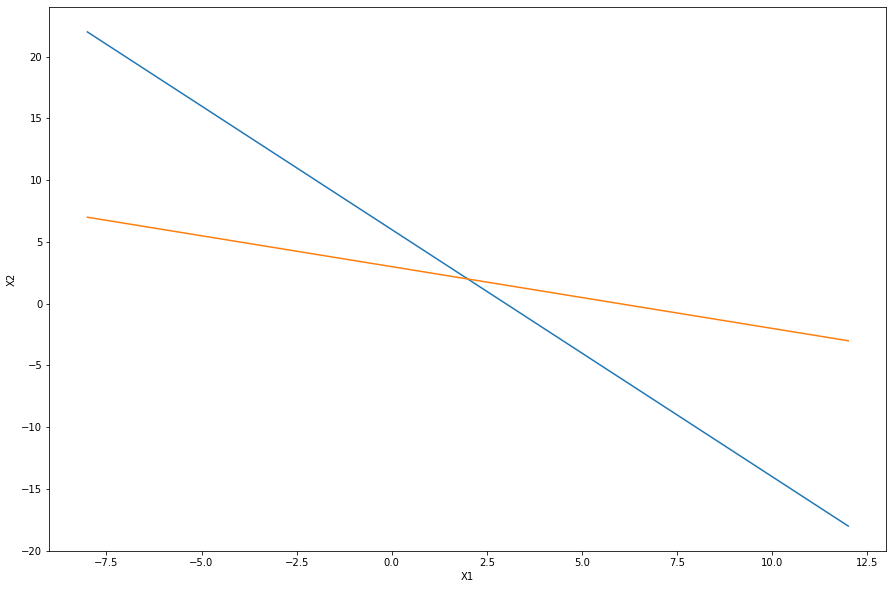

In [3]:
draw_system(A,b)

In [4]:
print(la.solve(A,b))

[2. 2.]


### Cilj nam je da od trenutnog rešenja, tj. neke dve vrednosti za $x^k_1$ i $x^k_2$ proizvedemo sledeće rešenje, tj. dve nove vrednosti za $x^{k+1}_1$ i $x^{k+1}_2$.

### Krećemo od zadatog sistema:

### $$2x_1+x_2=6\\x_1+2x_2=6$$

### Izražavamo iz svake jednačine nepoznate, tako da pazimo na redosled.
### Iz prve jedančine izražavamo prvu nepoznatu $x_1$, iz druge jednačine drugu nepoznatu $x_2$ i tako redom.
### Redosled jednačina je veoma važan jer utiče na konvergenciju metoda.
### Ne postoji pravilo po kome se bira redosled, već je to predmet eksperimentisanja (što je dosta često u oblastima kao što su Numerika ili Veštačka inteligencija).

### $$x_1=\frac{(6-x_2)}{2}\\x_2=\frac{(6-x_1)}{2}$$

### Zadajemo neko početno rešenje, na slučajan način:

### $$x^0=\begin{bmatrix}x^0_{1}\\x^0_{2}\end{bmatrix}=\begin{bmatrix}5\\10\end{bmatrix}$$

### Koristimo nepoznate koje smo izrazili kao iterativnu formulu.
### Prva jednačina iz koje smo izrazili $x_1$ služi nam da od $x^0_1$ dobijemo novo, tj. sledeće $x^1_1$, a druga za $x_2$ i tako redom.

### $$x^1_1=\frac{(6-x^0_2)}{2}=x^1_1=\frac{(6-10)}{2}=-2\\x^1_2=\frac{(6-x^0_1)}{2}=\frac{(6-5)}{2}=\frac{1}{2}$$

### Implementiramo zamenu početnog rešenja u iterativnu formulu Jakobijevog metoda.

In [5]:
x0=np.array([5.,10.])
x1=np.zeros(2)
x1[0] = (6 - x0[1])/2.
x1[1] = (6 - x0[0])/2.

print(x1)

[-2.   0.5]


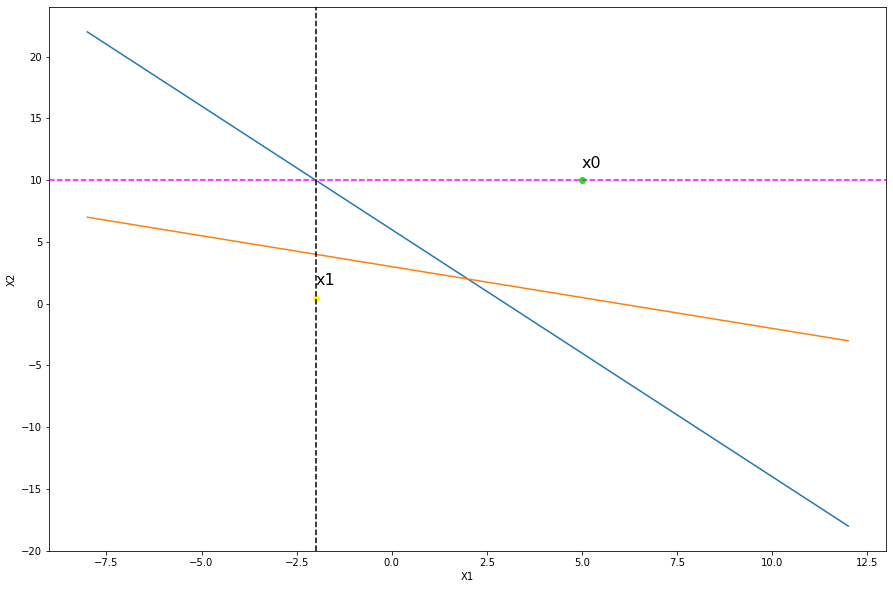

In [6]:
draw_system(A,b)
draw_point(x0,[0, 1, 0],'x0')
draw_point(x1,[1, 1, 0],'x1')
draw_dotted_lines(x0,x1,1)

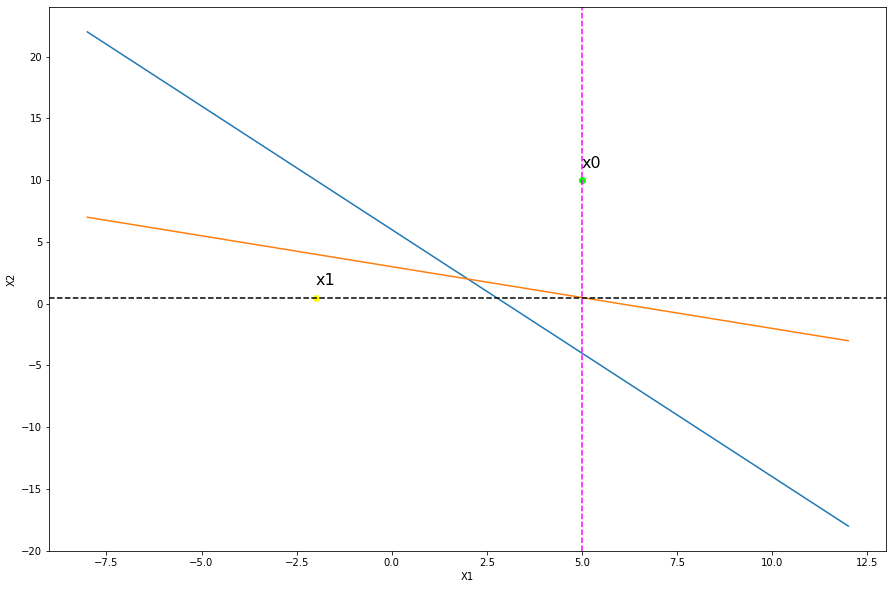

In [7]:
draw_system(A,b)
draw_point(x0,[0, 1, 0],'x0')
draw_point(x1,[1, 1, 0],'x1')
draw_dotted_lines(x0,x1,2)

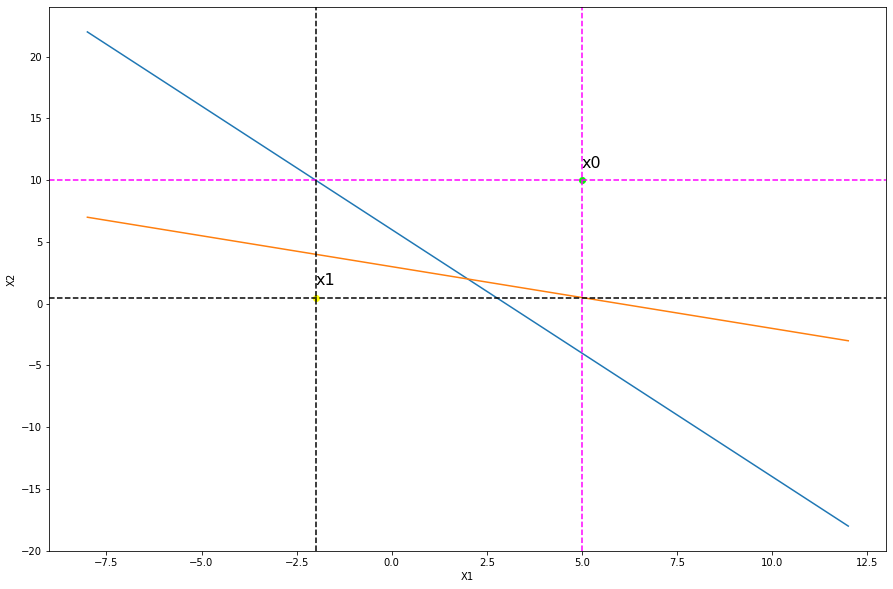

In [8]:
draw_system(A,b)
draw_point(x0,[0, 1, 0],'x0')
draw_point(x1,[1, 1, 0],'x1')
draw_dotted_lines(x0,x1,3)

### Nakon što smo od $x^0$ odbili sada ubacujemo $x^1$ u iterativnu formulu da dobijemo $x^2$.

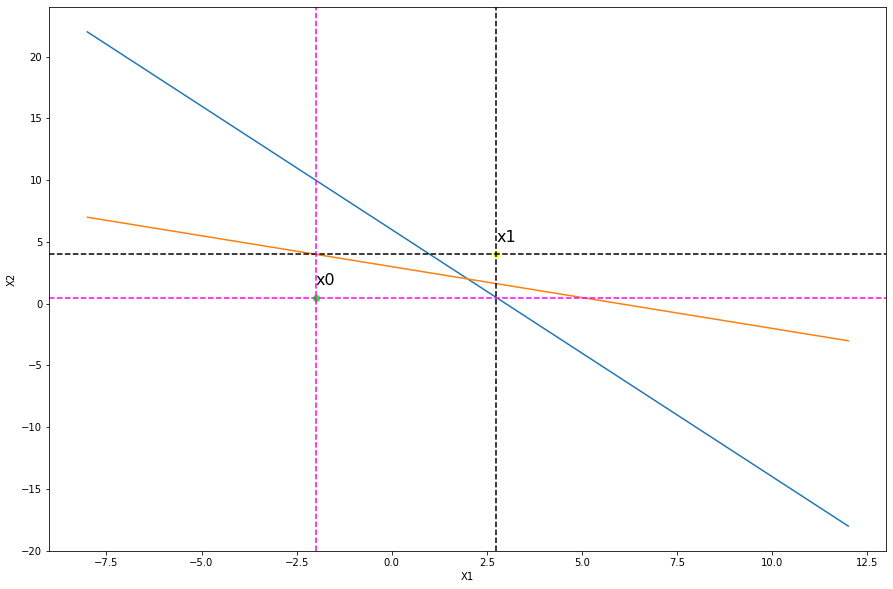

In [9]:
x0=x1.copy()
x1=np.zeros(2)
x1[0] = (6 - x0[1])/2.
x1[1] = (6 - x0[0])/2.
draw_system(A,b)
draw_point(x0,[0, 1, 0],'x0')
draw_point(x1,[1, 1, 0],'x1')
draw_dotted_lines(x0,x1,3)

### Uopštavamo kod da bi mogli da ga primenimo na bilo koji sistem koji je 2x2.

In [10]:
A=np.array([[2.,1.],[1.,2.]])
b=np.array([6.,6.])

In [11]:
#umesto konstanti, kao u kodu ranije, sada koristimo elemente matrice A i vektora b, 
#da bi kod mogao da se primeni na bilo koji sistem 2x2.
x0=[5,10]
x1=np.zeros(2)
x1[0] = (b[0] - A[0,1]*x0[1])/A[0,0]
x1[1] = (b[1] - A[1,0]*x0[0])/A[1,1]
print(x1)

[-2.   0.5]


#### Crtamo resenje sa upoštenim kodom.
#### Dodajemo for petlju koja izvršava iteracije. Sada možemo da proizvedemo proizvoljan broj rešenja.

[10 20]
[-7. -2.]
[4.  6.5]
[-0.25  1.  ]
[2.5   3.125]
[2. 2.]


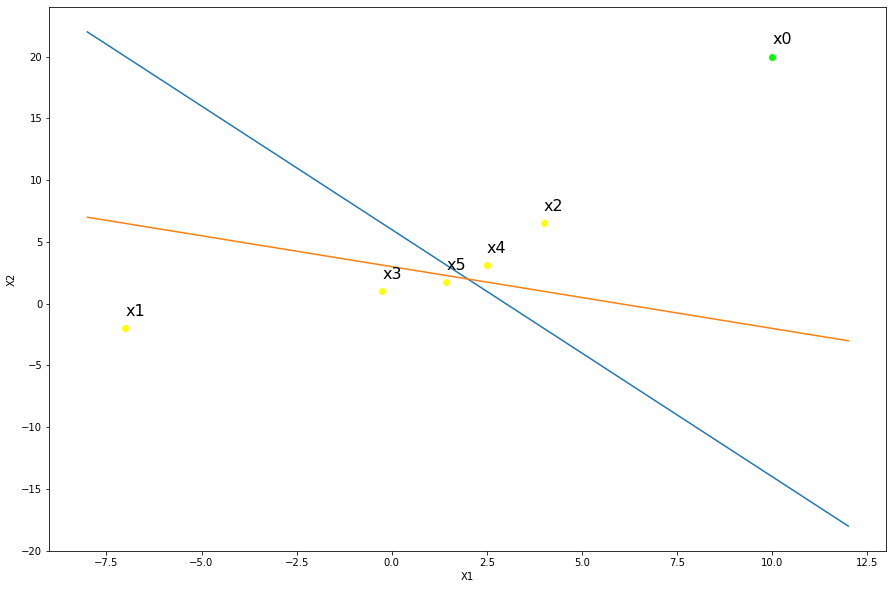

In [13]:
x0=np.array([10,20])
draw_system(A,b)
draw_point(x0,[0, 1, 0],'x0')
x1=np.zeros(2)
maxIter = 5
for i in range(maxIter):
    x1[0] = (b[0] - A[0,1]*x0[1])/A[0,0]
    x1[1] = (b[1] - A[1,0]*x0[0])/A[1,1]
    draw_point(x1,[1, 1, 0],'x'+str(i+1))
    print(x0)
    x0=x1.copy()
print(la.solve(A,b))

### Pogledaćemo sada animaciju geometrijske intepretacije Jakovijevog metoda sa slajdova.

### Kako bi lakše napisali upošten kod za Jakobijev metod, primenićemo prvo metod na sistem sa tri jednačine i tri nepoznate.

### $$4x_1-x_2-x_3=3\\-2x_1+6x_2+x_3=9\\-x_1+x_2+7x_3=-6$$

### Izražavamo promenljive:

### $$x_1=(3+x_2+x_3)/4\\x_2=(9+2x_1-x_3)/6\\x_3=(-6+x_1-x_2)/7$$

### Zadajemo početno rešenje:

### $$x^0=\begin{bmatrix}x^0_{1}\\x^0_{2}\\x^0_{3}\end{bmatrix}=\begin{bmatrix}1\\2\\3\end{bmatrix}$$

### Koristimo iterativnu formulu da proizvedemo sledeće rešenje:

### $$x^1_1=(3+x^0_2+x^0_3)/4=(3+2+3)/4=2\\x^1_2=(9+2x^0_1-x^0_3)/6=(9+2\cdot1-3)/6=\frac{4}{3}\\x^1_3=(-6+x^0_1-x^0_2)/7=(-6+1-2)/7=-1$$

### Pišemo sada funkciju za Jakobijev metod i povezujemo je sa primerom sistema 3x3.

In [15]:
def jacobi(A,b,x0,maxIter,tacnost):
    (n,m) = A.shape
    x1=np.zeros(n)
    for k in range(maxIter):
        for i in range(n):
            s=0 #ovo je suma vrednosti koje "prebacujemo na drugu stranu" kada izražavmo svaku nepoznatu
            for j in range(n):
                if i != j: #pošto je nepoznata i sa leve strane jednakosti, ne može da se nađe u sumi sa desne strane, pa je zato preskačemo
                    s = s + A[i,j]*x0[j]
                x1[i] = (b[i] - s)/A[i,i] # izračunavamo vrednost promenljive koju smo izrazili
        if(la.norm(x0-x1,np.Inf)<tacnost): #proveravmo da li je razlika trenutnog i početnog rešenja pala ispod zadate tačnosti
            break
        x0=x1.copy()
    return x1

In [17]:
A=np.array([[4,-1,-1],[-2,6,1],[-1,1,7]])
b=np.array([3,9,-6])
x=jacobi(A,b,[1,2,3],100,np.power(10,-5.))

print(x)

[ 0.99999806  2.00000202 -0.99999868]


### Dodaćemo sada u kod malo ispisa da bi mogli da pratimo rešenje kroz iteracije. Slobodno možete ignorisati kod za ispis jer nije deo gradiva.

In [25]:
def jacobi_ispis(A,b,x0,maxIter,tacnost):
    (n,m) = A.shape
    x1=np.zeros(n)
    print("Iteracija\t |x1-x0|\t\t\tx1")
    for k in range(maxIter):
        for i in range(n):
            s=0
            for j in range(n):
                if i != j:
                    s = s + A[i,j]*x0[j]
                x1[i] = (b[i] - s)/A[i,i]
        if(la.norm(x0-x1,np.Inf)<tacnost):
            break
        tmp_str = "%.8f \t %.8f" % (k,la.norm(x0-x1,np.Inf))
        print(tmp_str+"\t"+str(x1))
        x0=x1.copy()
    return x1

In [26]:
A=np.array([[4,-1,-1],[-2,6,1],[-1,1,7]])
b=np.array([3,9,-6])
x=jacobi_ispis(A,b,[1,2,3],100,np.power(10,-5.))

Iteracija	 |x1-x0|			x1
0.00000000 	 4.00000000	[ 2.          1.33333333 -1.        ]
1.00000000 	 1.16666667	[ 0.83333333  2.33333333 -0.76190476]
2.00000000 	 0.42857143	[ 1.14285714  1.9047619  -1.07142857]
3.00000000 	 0.18452381	[ 0.95833333  2.05952381 -0.96598639]
4.00000000 	 0.07908163	[ 1.02338435  1.98044218 -1.01445578]
5.00000000 	 0.03188776	[ 0.9914966   2.01020408 -0.9938654 ]
6.00000000 	 0.01406098	[ 1.00408467  1.9961431  -1.0026725 ]
7.00000000 	 0.00571702	[ 0.99836765  2.00180697 -0.99886549]
8.00000000 	 0.00254017	[ 1.00073537  1.9992668  -1.00049133]
9.00000000 	 0.00106021	[ 0.99969387  2.00032701 -0.9997902 ]
10.00000000 	 0.00046402	[ 1.0001342   1.99986299 -1.00009045]
11.00000000 	 0.00019682	[ 0.99994314  2.00005981 -0.99996126]
12.00000000 	 0.00008522	[ 1.00002464  1.99997459 -1.00001667]
13.00000000 	 0.00003640	[ 0.99998948  2.00001099 -0.99999285]
14.00000000 	 0.00001569	[ 1.00000454  1.9999953  -1.00000307]


In [27]:
A=np.array([[2,1],[1,2]])
b=np.array([6,6])
x=jacobi_ispis(A,b,[5,10],100,np.power(10,-5.))

Iteracija	 |x1-x0|			x1
0.00000000 	 9.50000000	[-2.   0.5]
1.00000000 	 4.75000000	[2.75 4.  ]
2.00000000 	 2.37500000	[1.    1.625]
3.00000000 	 1.18750000	[2.1875 2.5   ]
4.00000000 	 0.59375000	[1.75    1.90625]
5.00000000 	 0.29687500	[2.046875 2.125   ]
6.00000000 	 0.14843750	[1.9375    1.9765625]
7.00000000 	 0.07421875	[2.01171875 2.03125   ]
8.00000000 	 0.03710938	[1.984375   1.99414062]
9.00000000 	 0.01855469	[2.00292969 2.0078125 ]
10.00000000 	 0.00927734	[1.99609375 1.99853516]
11.00000000 	 0.00463867	[2.00073242 2.00195312]
12.00000000 	 0.00231934	[1.99902344 1.99963379]
13.00000000 	 0.00115967	[2.00018311 2.00048828]
14.00000000 	 0.00057983	[1.99975586 1.99990845]
15.00000000 	 0.00028992	[2.00004578 2.00012207]
16.00000000 	 0.00014496	[1.99993896 1.99997711]
17.00000000 	 0.00007248	[2.00001144 2.00003052]
18.00000000 	 0.00003624	[1.99998474 1.99999428]
19.00000000 	 0.00001812	[2.00000286 2.00000763]


# Gaus-Zajedelov metod

### Jakobijev postupak u trenutnoj iteraciji ne koristi najnovije informacije o rešenju. 
### Konkretnije kad računamo $x^1_1$ i $x^1_2$, koristimo $x^0_1$ i $x^0_2$ ali, pre nego što izračunamo $x^1_2$ vrednost $x^1_1$ je već izračunata. 
### Ako pretpostavimo da metod konvergira vrednost $x^1_1$ je jedan korak bliža tačnom rešenju od $x^0_1$, pa se postavlja pitanje da li je možemo iskoristiti umesto $x^0_1$.
### Na taj način dobijamo Gaus−Zajdelov postupak.

<center><img src="GausZ.png" width="600" height="600"></center>

### Primenjujemo Gaus-Zajdelov metod na isti primer 2x2 sistema na kome smo pokazali Jakobijev metod.

### $$2x_1+x_2=6\\x_1+2x_2=6$$

### $$x^{novo}_1=\frac{(6-x^{staro}_2)}{2}\\x^{novo}_2=\frac{(6-x^{novo}_1)}{2}$$

### $$x^0=\begin{bmatrix}x^0_{1}\\x^0_{2}\end{bmatrix}=\begin{bmatrix}5\\10\end{bmatrix}$$

### $$x^1_1=\frac{(6-x^0_2)}{2}=x^1_1=\frac{(6-10)}{2}=-2\\x^1_2=\frac{(6-x^1_1)}{2}=\frac{(6+2)}{2}=4$$

### $$x^2_1=\frac{(6-x^1_2)}{2}=x^2_1=\frac{(6-4)}{2}=1\\x^2_2=\frac{(6-x^2_1)}{2}=\frac{(6-1)}{2}=\frac{5}{2}$$

### Sada samo izvršavamo funkciju za Gaus-Zajdelov metod, a kod ćemo objasniti kasnije.

In [28]:
def gausz_viz(A,b,x0,maxIter,tacnost):
    (n,m) = A.shape
    if n==2:
        draw_point(x0,[1, 1, 0],'x'+str(0)) #ovo je deo za prikaz grafika i možete ga ignorisati
    x1=np.zeros(n)
    for k in range(maxIter):
        for i in range(n):
            s=0
            for j in range(i):
                s = s + A[i,j]*x1[j]
            for j in range(i+1,n):
                s = s + A[i,j]*x0[j]
            x1[i] = (b[i] - s)/A[i,i]
        
        if n==2: #ovo je deo za prikaz grafika i možete ga ignorisati
            draw_point(x1,[1, 1, 0],'x'+str(k+1))
            draw_dotted_lines_gz(x0,x1)
        
        if(la.norm(x0-x1,np.Inf)<tacnost):
            break
        
        tmp_str = "%.8f \t %.8f" % (k,la.norm(x0-x1,np.Inf))
        print(tmp_str+"\t"+str(x1))
        
        x0=x1.copy()
    return x1

0.00000000 	 7.00000000	[-2.  4.]


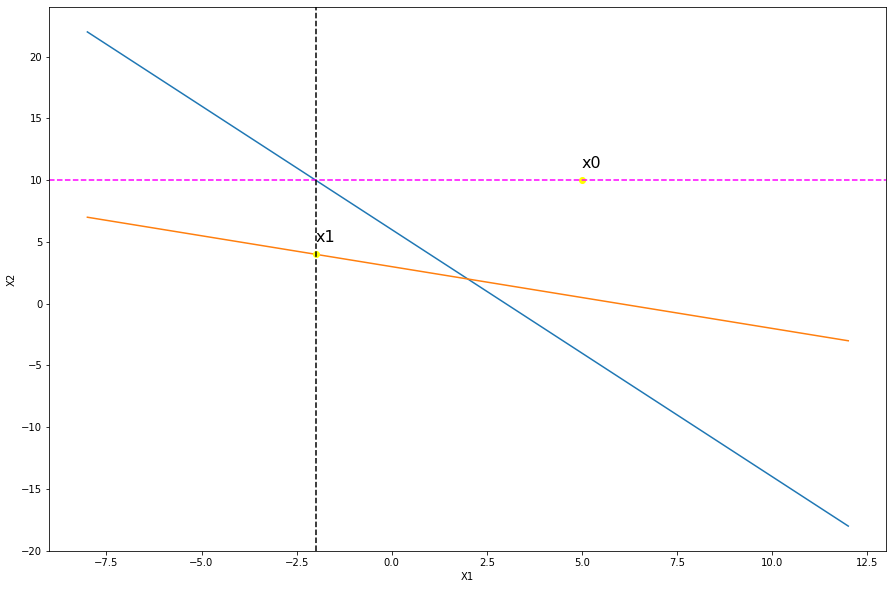

In [29]:
A=np.array([[2,1],[1,2]])
b=np.array([6,6])
draw_system(A,b)
x0=np.array([5,10])
x=gausz_viz(A,b,x0,1,np.power(10,-5.))

0.00000000 	 7.00000000	[-2.  4.]
1.00000000 	 3.00000000	[1.  2.5]


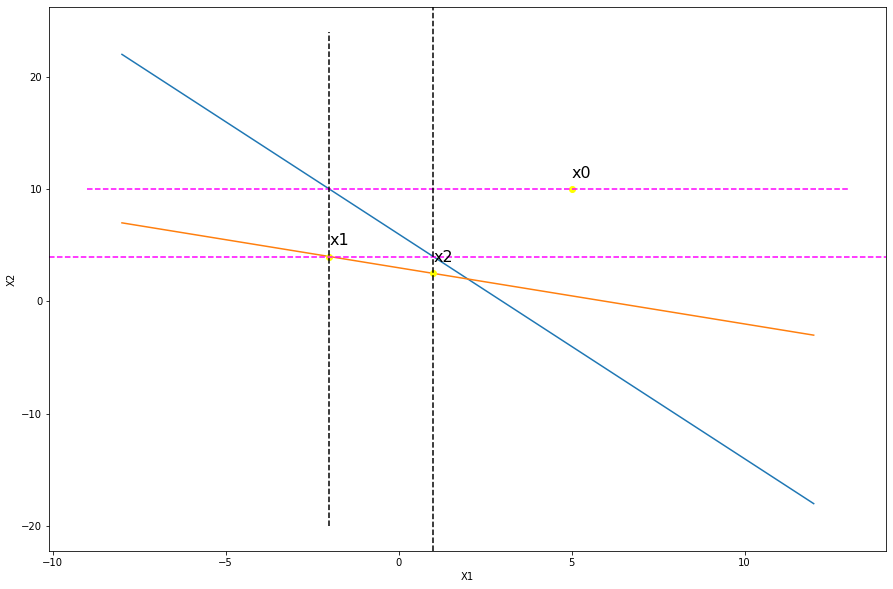

In [30]:
A=np.array([[2,1],[1,2]])
b=np.array([6,6])
draw_system(A,b)
x0=np.array([5,10])
x=gausz_viz(A,b,x0,2,np.power(10,-5.))

### Pogledaćemo sada animaciju geometrijske intepretacije Jakovijevog metod sa slajdova.

### Pišemo kod za Gaus-Zajdelov metod. Kao pomoć koristimo isti primer 3x3 sistema kao za Jakobijev metod.

### $$4x_1-x_2-x_3=3\\-2x_1+6x_2+x_3=9\\-x_1+x_2+7x_3=-6$$

### $$x^{novo}_1=(3+x^{staro}_2+x^{staro}_3)/4\\x^{novo}_2=(9+2x^{novo}_1-x^{staro}_3)/6\\x^{novo}_3=(-6+x^{novo}_1-x^{novo}_2)/7$$

### $$x^0=\begin{bmatrix}x^0_{1}\\x^0_{2}\\x^0_{3}\end{bmatrix}=\begin{bmatrix}1\\2\\3\end{bmatrix}$$

### $$x^1_1=(3+x^0_2+x^0_3)/4=(3+2+3)/4=2\\x^1_2=(9+2x^1_1-x^0_3)/6=(9+2\cdot2-3)/6=\frac{5}{3}\\x^1_3=(-6+x^1_1-x^1_2)/7=(-6+2-\frac{5}{3})/7=-\frac{17}{21}$$

In [31]:
def gausz(A,b,x0,maxIter,tacnost):
    (n,m) = A.shape
    x1=np.zeros(n)
    for k in range(maxIter):
        for i in range(n):
            s=0
            for j in range(i):
                s = s + A[i,j]*x1[j]
            for j in range(i+1,n):
                s = s + A[i,j]*x0[j]
            x1[i] = (b[i] - s)/A[i,i]
        if(la.norm(x0-x1,np.Inf)<tacnost):
            break
        x0=x1.copy()
    return x1

In [33]:
A=np.array([[4,-1,-1],[-2,6,1],[-1,1,7]])
b=np.array([3,9,-6])
x=gausz(A,b,[1,2,3],100,np.power(10,-5.))

print(x)

[ 0.9999999   2.00000009 -1.00000003]


### Dodaćemo sada u kod malo ispisa da bi mogli da pratimo rešenje kroz iteracije. Slobodno možete ignorisati kod za ispis jer nije deo gradiva.

In [35]:
def gausz_ispis(A,b,x0,maxIter,tacnost):
    (n,m) = A.shape
    x1=np.zeros(n)
    print("Iteracija\t |x1-x0|\t\t\tx1")
    for k in range(maxIter):
        for i in range(n):
            s=0
            for j in range(i):
                s = s + A[i,j]*x1[j]
            for j in range(i+1,n):
                s = s + A[i,j]*x0[j]
            x1[i] = (b[i] - s)/A[i,i]
            
        tmp_str = "%.8f \t %.8f" % (k,la.norm(x0-x1,np.Inf))
        print(tmp_str+"\t"+str(x1))
        
        if(la.norm(x0-x1,np.Inf)<tacnost):
            break
        x0=x1.copy()
    return x1

### Ispisujemo rezultate po iteracijama i poredimo Gaus-Zajdelovu i Jakobijevu metodu.

In [36]:
A=np.array([[4,-1,-1],[-2,6,1],[-1,1,7]])
b=np.array([3,9,-6])
print('Gauss-Seidel')
x=gausz_ispis(A,b,[1,2,3],100,np.power(10,-5.))
print('Jacobi')
x=jacobi_ispis(A,b,[1,2,3],100,np.power(10,-5.))

Gauss-Seidel
Iteracija	 |x1-x0|			x1
0.00000000 	 3.80952381	[ 2.          1.66666667 -0.80952381]
1.00000000 	 1.03571429	[ 0.96428571  1.95634921 -0.99886621]
2.00000000 	 0.03991875	[ 0.98937075  1.99626795 -1.00098531]
3.00000000 	 0.00944991	[ 0.99882066  1.99977111 -1.00013578]
4.00000000 	 0.00108817	[ 0.99990883  1.99999224 -1.00001192]
5.00000000 	 0.00008625	[ 0.99999508  2.00000035 -1.00000075]
6.00000000 	 0.00000482	[ 0.9999999   2.00000009 -1.00000003]
Jacobi
Iteracija	 |x1-x0|			x1
0.00000000 	 4.00000000	[ 2.          1.33333333 -1.        ]
1.00000000 	 1.16666667	[ 0.83333333  2.33333333 -0.76190476]
2.00000000 	 0.42857143	[ 1.14285714  1.9047619  -1.07142857]
3.00000000 	 0.18452381	[ 0.95833333  2.05952381 -0.96598639]
4.00000000 	 0.07908163	[ 1.02338435  1.98044218 -1.01445578]
5.00000000 	 0.03188776	[ 0.9914966   2.01020408 -0.9938654 ]
6.00000000 	 0.01406098	[ 1.00408467  1.9961431  -1.0026725 ]
7.00000000 	 0.00571702	[ 0.99836765  2.00180697 -0.99886549]
8.

### Ispisujemo rezultate po iteracijama i poredimo Gaus-Zajdelovu i Jakobijevu metodu za primer sistema 2x2 koji smo koristili do sada.

In [37]:
A=np.array([[2,1],[1,2]])
b=np.array([6,6])
x0=np.array([5,10])
print('Gauss-Seidel')
x=gausz_ispis(A,b,x0,100,np.power(10,-5.))
print('Jacobi')
x=jacobi_ispis(A,b,x0,100,np.power(10,-5.))

Gauss-Seidel
Iteracija	 |x1-x0|			x1
0.00000000 	 7.00000000	[-2.  4.]
1.00000000 	 3.00000000	[1.  2.5]
2.00000000 	 0.75000000	[1.75  2.125]
3.00000000 	 0.18750000	[1.9375  2.03125]
4.00000000 	 0.04687500	[1.984375  2.0078125]
5.00000000 	 0.01171875	[1.99609375 2.00195312]
6.00000000 	 0.00292969	[1.99902344 2.00048828]
7.00000000 	 0.00073242	[1.99975586 2.00012207]
8.00000000 	 0.00018311	[1.99993896 2.00003052]
9.00000000 	 0.00004578	[1.99998474 2.00000763]
10.00000000 	 0.00001144	[1.99999619 2.00000191]
11.00000000 	 0.00000286	[1.99999905 2.00000048]
Jacobi
Iteracija	 |x1-x0|			x1
0.00000000 	 9.50000000	[-2.   0.5]
1.00000000 	 4.75000000	[2.75 4.  ]
2.00000000 	 2.37500000	[1.    1.625]
3.00000000 	 1.18750000	[2.1875 2.5   ]
4.00000000 	 0.59375000	[1.75    1.90625]
5.00000000 	 0.29687500	[2.046875 2.125   ]
6.00000000 	 0.14843750	[1.9375    1.9765625]
7.00000000 	 0.07421875	[2.01171875 2.03125   ]
8.00000000 	 0.03710938	[1.984375   1.99414062]
9.00000000 	 0.0185546

# Konvergencija iterativnih metoda

### Za razumevanje konvergencije iterativnih metoda za rešavanje SLAJ potrebno je prvo da pokažemo da se metode koje smo danas učili mogu prikazati pomoću matrica.
### Prvo treba uvideti da se svaki sistem oblika $Ax=b$ može transformisati u sldeći oblik:

### $$x=Tx+c$$

### , gde je $T$ matrica, a $c$ vektor. Kada uradimo transformaciju, onda možemo $x$ sa leve strane jedankosti da proglasimo za sledeće, a $x$ sa desne strane za prethodno rešenje i tako dobijemo iterativnu formulu:

### $$x^{k+1}=Tx^k+c$$

### Sada ćemo pokazati na koji način formiramo matricu $T$ i vektor $c$ za Jakobijev metod. Matricu sistema $A$ rastavljamo na tri matrice:

### $$A=L+D+U\\\begin{bmatrix}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}\\
a_{31} & a_{32} & a_{33}\\
\end{bmatrix}=\begin{bmatrix}
0 & 0 & 0\\
a_{21} & 0& 0\\
a_{31} & a_{32} & 0\\
\end{bmatrix}+\begin{bmatrix}
a_{11} & 0 & 0\\
0 & a_{22} & 0\\
0 & 0 & a_{33}\\
\end{bmatrix}+\begin{bmatrix}
0 & a_{12} & a_{13}\\
0 & 0 & a_{23}\\
0 & 0 &0\\
\end{bmatrix}$$

### Ako koristimo matrične i vektorske operacije jasno je da važi:

### $$Ax=b\\(L+D+U)x=b$$

### Ako hoćemo da sa leve strane jednakosti iz prve jedančine izrazimo $x_1$, iz druge $x_2$ i tako redom, to pomoću matričnih operacija možemo uraditi na sledeći način:

### $$Dx+Lx+Ux=b\\Dx=-(L+U)x+b\\x=-D^{-1}(L+U)x+D^{-1}b$$

### Ako sada uradimo sledeće dodele za matricu $T$ i vektor $c$ i uvedemo brojač iteracija $k$ imamo sledeće:

### $$x=-D^{-1}(L+U)x+D^{-1}b\\T=-D^{-1}(L+U)\\c=D^{-1}b\\x^{k+1}=Tx^k+c$$

### Matricu $T$ i vektor $c$ za Gaus-Zajedelov metod određujemo na sličan način. Razlika je u tome što sa leve strane jednakosti sada ostavljamo sve nepoznate do one na glavnoj dijagonali, kao i tu na glavnoj dijagonali.

### $$Dx+Lx+Ux=b\\Dx^{k+1}+Lx^{k+1}=-Ux^k+b\\x^{k+1}=-(D+L)^{-1}Ux^k+(D+L)^{-1}b\\T=-(D+L)^{-1}U\\c=(D+L)^{-1}b\\x^{k+1}=Tx^k+c$$

### Sada kada imamo formule za matricu $T$ možemo da pokažemo zašto je ona značajna za konvergenciju.
### Neka je $\hat{x}$ tačno rešenje nekog sistema, a $e_k$ greška u $k$-toj iteraciji metoda, odnosno važi:

### $$x_k=e_k+\hat{x}$$

### U prethodnu jednakost ubacujemo $x^{k+1}=Tx^k+c$ i tako dobijamo:

### $$e_{k+1}+\hat{x}=x^{k+1}=Tx^k+c=T(e_k+\hat{x})+c=Te_k+T\hat{x}+c$$

### Pošto je $\hat{x}$ tačno rešenje onda važi $T\hat{x}+c=\hat{x}$ pa imamo sledeće:

### $$e_{k+1}+\hat{x}=Te_k+T\hat{x}+c\\e_{k+1}=Te_k$$

### Ako nastavimo da smanjujemo $k$ i koristimo $e_{k+1}=Te_k$ imamo:

### $$e_{k+1}=Te_k=TTe_{k-1}=TTTe_{k-2}=\dots=T^{k+1}e^0$$

### Uspeli smo da povežemo grešku u iteraciji $k$ sa matricom $T$. Ako uzmemo normu greške $e$ imamo:

### $$\lVert e_{k+1}\rVert \leq \lVert T^{k+1}\rVert \lVert e^0\rVert$$

### Očigledno je da ako je norma od $T$ veća od 1, greška će se kroz iteracije povećavati, odnosno metod će divergirati.
### Takođe, ako je norma od $T$ manja od 1, greška će se smanjivati odnosno metod će konvergirati.
### Ovi uslovi važe za bilo koje početno rešenje $x_0$.

### $$\lim_{k\to\infty} \lVert e^k\rVert=0 \textrm{   ako   }\lim_{k\to\infty} \lVert T^k\rVert=0$$

### Da bi važilo $\lim_{k\to\infty} \lVert T^k\rVert=0$ treba da važi:

### $$\lVert T\rVert<1$$

### Znači, da bi proverili konvergenciju iterativnog metoda, potrebno je prvo da izračunamo matricu $T$ i onda proverimo da li je norma te matrice manja od 1.
### Problem sa ovim testom za konvergenciju je što postoji više različitih načina da odredimo normu matrice, a ako neka od normi nije manja od jedan to ne mora da znači da neka druga neće biti, kao što možete videti u sledećem primeru:

In [39]:
A=np.array([[0.5,0.1],[0.6,0.3]])
print(A)
print(la.norm(A,1))
print(la.norm(A,np.Inf))

[[0.5 0.1]
 [0.6 0.3]]
1.1
0.8999999999999999


### To znači da nam treba test konvergencije koji ne koristi normu matrice.

## Spektralni radijus matrice

### Spektralni radijus je najveća *karakteristična vrednost* matrice:

### $$\rho(T)=\max_{i}|\lambda_i|$$

### Karakteristične vrednosti su vrednosti za koje važi:

### $$Tx=\lambda x$$

### Postoji tvrđenje koje nećemo dokazivati koje kaže da je svaka norma matrice veća ili jednaka od spektralnog radijusa te matrice:

### $$\rho(T)\leq\lVert T\rVert$$

### Što znači da ako je vrednost $\rho(T)$ veća od 1 onda će sve norme matrice $T$ biti veće od 1 pa iterativni postupak divergira.
### Dakle, potreban uslov za konvergenciju iterativnog metoda za rešavanje SLAJ za bilo koje početno rešenje je:
### $$\rho(T)<1$$, odnosno ako je $\rho(T)>1$ metod će divergirati.

### Postoji tvrđenje koje kaže da je $\rho(T)<1$ takođe i dovoljan uslov za konvergenciju, odosno ako važi: 
### $$\rho(T)<1$$ 
### onda metod konvergira. Dokaz za tvrđenje imate u udžbeniku predmeta.

### Testiraćemo sada konvergenciju na primerima 2x2 i 3x3 sistema koje smo koristili tokom predavanja.

In [41]:
def decompose_matrix(A): 
    L=np.tril(A,-1)
    U=np.triu(A,1)
    D=np.diagonal(A)*np.eye(A.shape[0])
    return [L,D,U]

def test_conv_jacobi(A):
    [L,D,U] = decompose_matrix(A)
    T=-np.matmul(la.inv(D),(L+U))
    ro=np.max(np.abs(la.eigvals(T)))
    return [T,ro]

def test_conv_gausz(A):
    [L,D,U] = decompose_matrix(A)
    T=-np.matmul(la.inv(L+D),U)
    ro=np.max(np.abs(la.eigvals(T)))
    return [T,ro]

In [42]:
#3x3 sistem koji smo do sada koristili
A=np.array([[4,-1,-1],[-2,6,1],[-1,1,7]])
b=np.array([3,9,-6])
tj=test_conv_jacobi(A)
tgz=test_conv_gausz(A)

In [43]:
print(tj[0])
print(tj[1])
print(tgz[0])
print(tgz[1])

[[-0.          0.25        0.25      ]
 [ 0.33333333 -0.         -0.16666667]
 [ 0.14285714 -0.14285714 -0.        ]]
0.42946178686069253
[[-0.          0.25        0.25      ]
 [-0.          0.08333333 -0.08333333]
 [-0.          0.02380952  0.04761905]]
0.07715167498104597


In [44]:
#2x2 sistem koji smo do sada koristili
A=np.array([[2,1],[1,2]])
b=np.array([6,6])
tj=test_conv_jacobi(A)
tgz=test_conv_gausz(A)

print(tj[0])
print(tj[1])
print(tgz[0])
print(tgz[1])

[[-0.  -0.5]
 [-0.5 -0. ]]
0.5000000000000001
[[-0.   -0.5 ]
 [-0.    0.25]]
0.25


## Primer divergencije

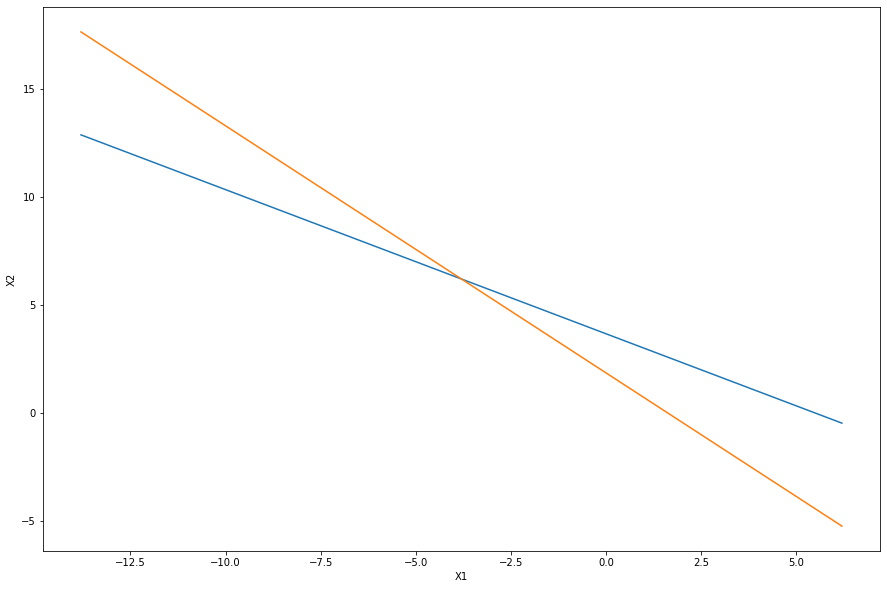

In [45]:
A=np.array([[2,3],[8,7]])
b=np.array([11,13])
draw_system(A,b)
tj=test_conv_jacobi(A)
tgz=test_conv_gausz(A)

In [46]:
print(tj[0])
print(tj[1])
print(tgz[0])
print(tgz[1])

[[-0.         -1.5       ]
 [-1.14285714 -0.        ]]
1.3093073414159544
[[-0.         -1.5       ]
 [-0.          1.71428571]]
1.7142857142857142


0.00000000 	 2.00000000	[-2.          4.14285714]
1.00000000 	 1.46938776	[-0.71428571  2.67346939]
2.00000000 	 2.51895044	[1.48979592 0.15451895]


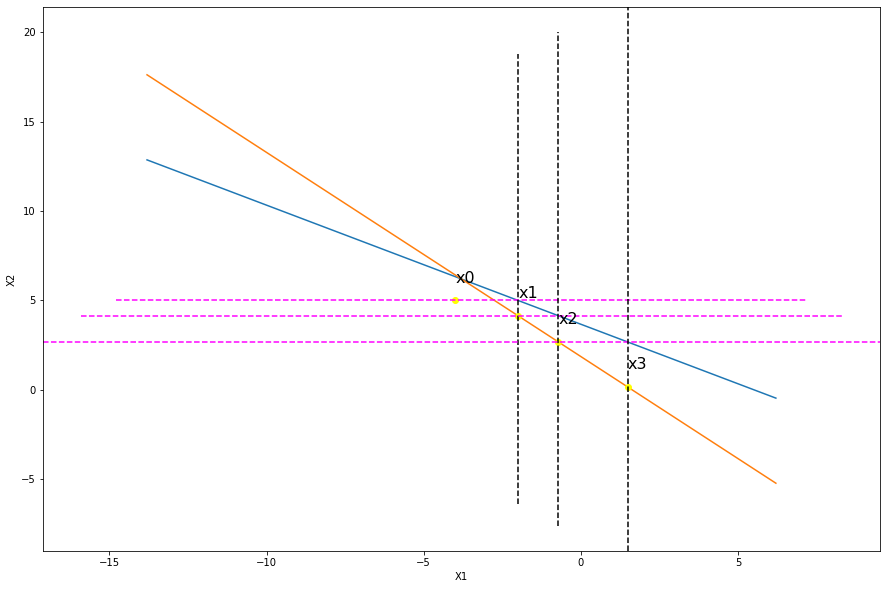

In [47]:
A=np.array([[2,3],[8,7]])
b=np.array([11,13])
draw_system(A,b)
x=gausz_viz(A,b,[-4,5],3,np.power(10,-5.))

In [48]:
A=np.array([[2,3],[8,7]])
b=np.array([11,13])
la.solve(A,b)

array([-3.8,  6.2])